In [16]:
import pandas as pd
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
reviews_df = pd.read_csv('../../Warehouse/Reviews/app_reviews_merged.csv')

In [5]:
# Filter out the rows without developer replies
replied_df = reviews_df.dropna(subset=['replyContent'])

In [6]:
# Convert at and repliedAt columns to datetime objects
replied_df['at'] = pd.to_datetime(replied_df['at'])
replied_df['repliedAt'] = pd.to_datetime(replied_df['repliedAt'])

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\671383597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['at'] = pd.to_datetime(replied_df['at'])
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\671383597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['repliedAt'] = pd.to_datetime(replied_df['repliedAt'])


In [7]:
# Calculate response time in hours
replied_df['response_time'] = (replied_df['repliedAt'] - replied_df['at']).dt.total_seconds() / 3600

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\2207786185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['response_time'] = (replied_df['repliedAt'] - replied_df['at']).dt.total_seconds() / 3600


In [8]:
# Calculate sentiment scores for review content and developer replies
replied_df['review_sentiment'] = replied_df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
replied_df['reply_sentiment'] = replied_df['replyContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\3349007998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['review_sentiment'] = replied_df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\3349007998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['reply_sentiment'] = replied_df['replyContent'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [9]:
# Calculate average response time and sentiment scores
avg_response_time = replied_df['response_time'].mean()
avg_review_sentiment = replied_df['review_sentiment'].mean()
avg_reply_sentiment = replied_df['reply_sentiment'].mean()

In [10]:
# Identify trends in developer response times
replied_df['month_year'] = replied_df['repliedAt'].dt.to_period('M')
monthly_response_time = replied_df.groupby('month_year')['response_time'].mean()
print("\nMonthly Average Response Time:")
print(monthly_response_time)


Monthly Average Response Time:
month_year
2019-08      13.503722
2020-01     461.641667
2020-03      63.025880
2020-04      27.554417
2020-06    5122.558246
2020-07      91.638497
2020-08     -40.035320
2020-09      23.883629
2020-10     -33.671016
2020-11     -19.468829
2020-12     -26.648515
2021-01    -127.995631
2021-02      -0.243659
2021-03      -0.929764
2021-04    -367.691399
2021-05     -57.330725
2021-06     -21.374553
2021-07    -192.109503
2021-08    -100.449967
2021-09     -17.886711
2021-10    -307.706392
2021-11    -411.236050
2021-12    -306.315748
2022-01    -242.985999
2022-02    -220.490977
2022-03    -182.847266
2022-04    -151.271307
2022-05     -79.596104
2022-06    -114.748430
2022-07    -185.556453
2022-08     -66.583604
2022-09     -27.433284
2022-10      75.868565
2022-11      33.074087
2022-12     -27.705760
2023-01      48.954400
2023-02      21.291049
2023-03      91.059706
2023-04     965.789216
Freq: M, Name: response_time, dtype: float64


C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_8096\990083051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replied_df['month_year'] = replied_df['repliedAt'].dt.to_period('M')


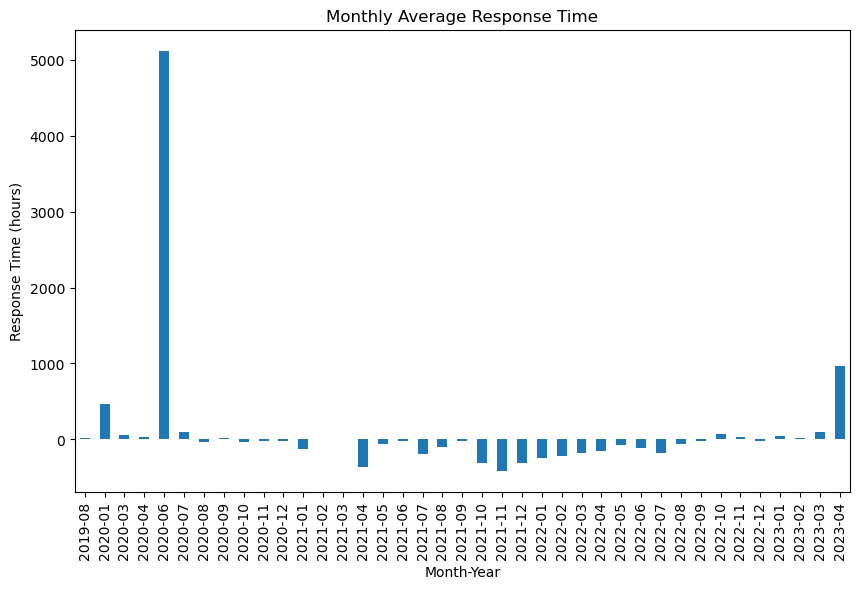

In [17]:
# Plot Monthly Average Response Time
monthly_response_time.plot(kind='bar', figsize=(10, 6), ylabel='Response Time (hours)', xlabel='Month-Year', title='Monthly Average Response Time')
plt.savefig('monthly_average_response_time.png')
plt.show()

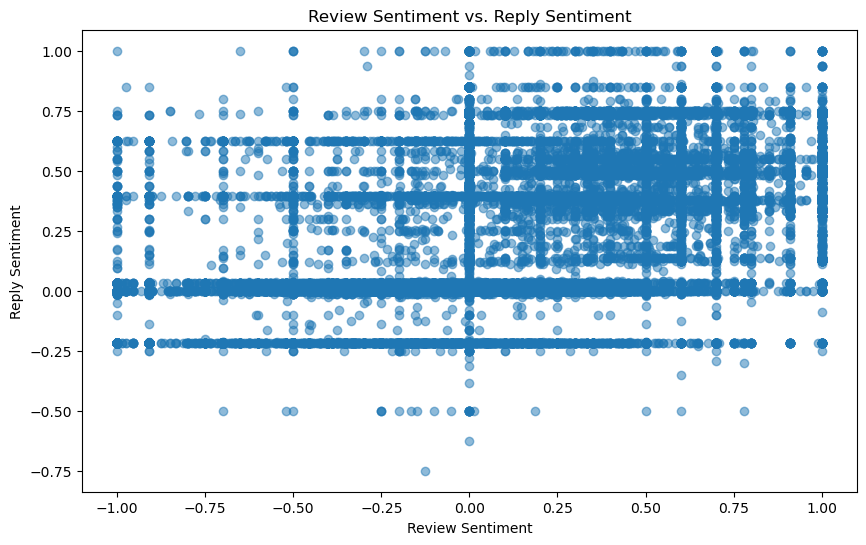

In [18]:
# Plot Review Sentiment vs. Reply Sentiment
plt.figure(figsize=(10, 6))
plt.scatter(replied_df['review_sentiment'], replied_df['reply_sentiment'], alpha=0.5)
plt.xlabel('Review Sentiment')
plt.ylabel('Reply Sentiment')
plt.title('Review Sentiment vs. Reply Sentiment')
plt.savefig('review_sentiment_vs_reply_sentiment.png')
plt.show()

In [11]:
# Correlate developer response sentiment with review sentiment
correlation = replied_df['review_sentiment'].corr(replied_df['reply_sentiment'])
print(f"\nCorrelation between Review Sentiment and Reply Sentiment: {correlation}")


Correlation between Review Sentiment and Reply Sentiment: 0.49286650541366706


In [14]:
monthly_response_time.to_csv('monthly_average_response_time.csv', header=True)
replied_df.to_csv('reviews_with_response_time_and_sentiment.csv', index=False)